In [1]:
import tensorflow as tf 
import numpy as np 
import keras 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
!ls ../data/pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [5]:
import os 
pizza_train_images = os.listdir("../data/pizza_steak/train/pizza/") 
pizza_files = ["../data/pizza_steak/train/pizza/" + file for file in pizza_train_images]
pizza_files[:5]

['../data/pizza_steak/train/pizza/1008104.jpg',
 '../data/pizza_steak/train/pizza/1008144.jpg',
 '../data/pizza_steak/train/pizza/1008844.jpg',
 '../data/pizza_steak/train/pizza/1008941.jpg',
 '../data/pizza_steak/train/pizza/1011404.jpg']

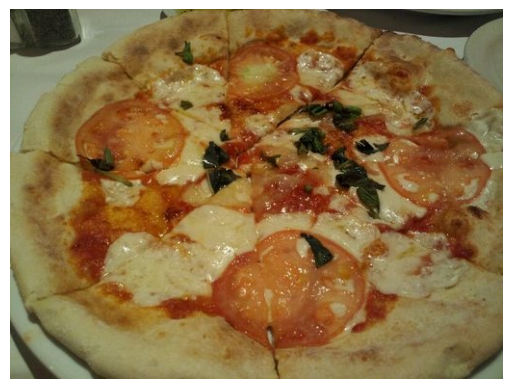

In [6]:
from PIL import Image 

img = Image.open(pizza_files[0]) 

plt.imshow(img) 
plt.axis("off")
plt.show();

In [7]:
for dirpath, dirnames, filenames in os.walk("../data/pizza_steak"): 
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '../data/pizza_steak'
There are 2 directories and 0 images in '../data/pizza_steak/test'
There are 0 directories and 250 images in '../data/pizza_steak/test/pizza'
There are 0 directories and 250 images in '../data/pizza_steak/test/steak'
There are 2 directories and 0 images in '../data/pizza_steak/train'
There are 0 directories and 750 images in '../data/pizza_steak/train/pizza'
There are 0 directories and 750 images in '../data/pizza_steak/train/steak'


In [13]:
import pathlib 

class_names = sorted([
    d for d in os.listdir("../data/pizza_steak/train/")
    if os.path.isdir(os.path.join("../data/pizza_steak/train/", d))
])
## Better way of gettin class labels 

data_dir = pathlib.Path("../data/pizza_steak/train/")

class_names = (sorted([
    item.name for item in data_dir.iterdir() if item.is_dir()
]))

class_names

['pizza', 'steak']

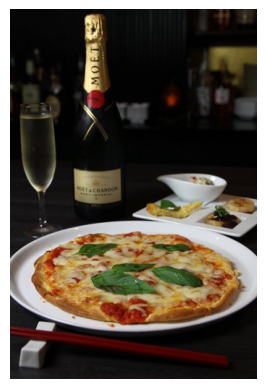

In [25]:
## Visualize a random image 
import random
import matplotlib.image as mpimg

def view_random_image(target_dir, class_name): 
    target_folder = os.path.join(target_dir, class_name)

    random_image = random.sample(os.listdir(target_folder), 1)[0]
    img_path = os.path.join(target_folder, random_image)
    img = mpimg.imread(img_path)

    plt.imshow(img)
    plt.axis("off")
    plt.show();

view_random_image(target_dir="../data/pizza_steak/train/", 
                 class_name="pizza")
    

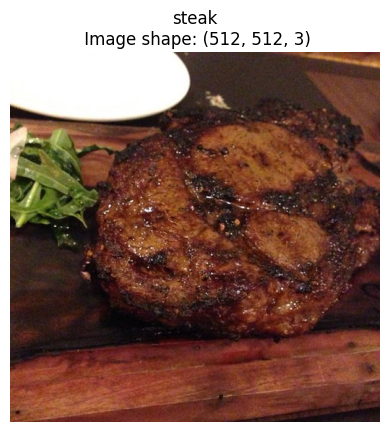

In [31]:
import random 
import matplotlib.image as mpimg


def plot_an_image(data_dir, class_name): 
    target_folder = os.path.join(data_dir, class_name) 
    random_img = random.sample(os.listdir(target_folder), 1)[0] 
    image_path = os.path.join(target_folder, random_img)
    img = mpimg.imread(image_path) 

    plt.imshow(img) 
    plt.title(f"{class_name}\n Image shape: {img.shape}") 
    plt.axis("off") 
    plt.show(); 
    return img 

img = plot_an_image(data_dir="../data/pizza_steak/train/", class_name="steak")

In [29]:
img.shape

(512, 512, 3)

In [32]:
img_resized = tf.image.resize(img, [256, 256]) 
img_resized.shape

TensorShape([256, 256, 3])

In [39]:
class_names

['pizza', 'steak']

In [54]:
## Sample CNN Model 
# 1 preprocess data

keras.utils.set_random_seed(42)

batch_size = 32 
img_height = 224 
img_width = 224 

train_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/pizza_steak/train/",
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=42,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/pizza_steak/test/",
    batch_size=32, 
    image_size=(img_height, img_width), 
    shuffle=True, 
    seed=42
)

normalizer = keras.layers.Rescaling(1./255) 
norm_train_ds = train_ds.map(lambda x, y: (normalizer(x), y))
norm_test_ds = test_ds.map(lambda x, y: (normalizer(x), y)) 

# 2. Create CNN Model 

model_a = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, 
                       kernel_size=3, 
                       activation='relu', 
                       input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.MaxPool2D(pool_size=2, 
                          padding="valid"), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.Conv2D(10, 3, activation='relu'), 
    keras.layers.MaxPool2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(1, activation="sigmoid")
]) 

# 3. Compile the model 

model_a.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", 
        patience=7, 
        restore_best_weights=True
    )
]

history_a = model_a.fit(
    norm_train_ds, 
    validation_data=norm_test_ds, 
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6363 - loss: 0.6185 - val_accuracy: 0.8460 - val_loss: 0.4052
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8224 - loss: 0.4307 - val_accuracy: 0.8180 - val_loss: 0.4254
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8282 - loss: 0.4007 - val_accuracy: 0.7720 - val_loss: 0.4645
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8440 - loss: 0.3713 - val_accuracy: 0.8700 - val_loss: 0.3441
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8842 - loss: 0.3284 - val_accuracy: 0.8640 - val_loss: 0.3320
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9060 - loss: 0.2492 - val_accuracy: 0.8580 - val_loss: 0.3277
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9392 - loss: 0.1675 - val_accuracy: 0.8000 - val_loss: 0.4875
Epoch 8/20
47/47 ━━━━━━━━━━━━━

In [55]:
model_a.evaluate(norm_train_ds)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9409 - loss: 0.1813


[0.17463025450706482, 0.9446666836738586]